# Problem

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Hours Studied: The total number of hours spent studying by each student.

Previous Scores: The scores obtained by students in previous tests.

Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

Sleep Hours: The average number of hours of sleep the student had per day.

Sample Question Papers Practiced: The number of sample question papers the student practiced.

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [57]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
per4mas = pd.read_csv("/content/Student_Performance (2).csv")

In [9]:
per4mas

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [10]:
per4mas.shape

(10000, 6)

In [11]:
per4mas.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [14]:
per4mas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
per4mas.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [16]:
per4mas.duplicated().sum()

127

In [17]:
# The data has 127 duplicated records , so we will use drop duplicates to get rid of them
per4mas = per4mas.drop_duplicates()

In [18]:
per4mas.shape

(9873, 6)

In [19]:
per4mas.duplicated().sum()

0

<ipython-input-46-a249900031e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(per4mas['Previous Scores'], kde=True, bins=30,color ='orange')


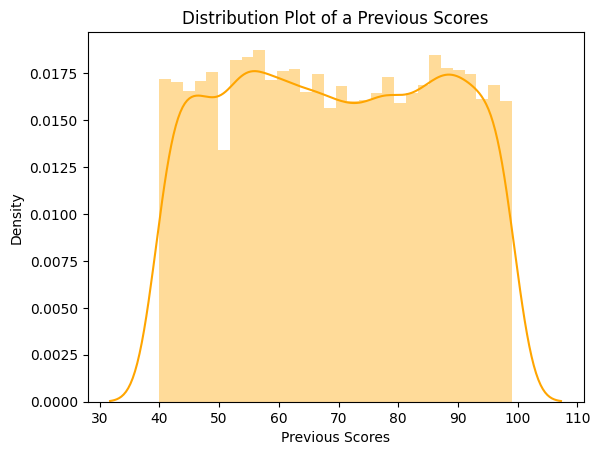

In [46]:
sns.distplot(per4mas['Previous Scores'], kde=True, bins=30,color ='orange')
plt.title('Distribution Plot of a Previous Scores')
plt.show()

The highest density of scores is around the center of the distribution, indicating that most scores are close to the average.

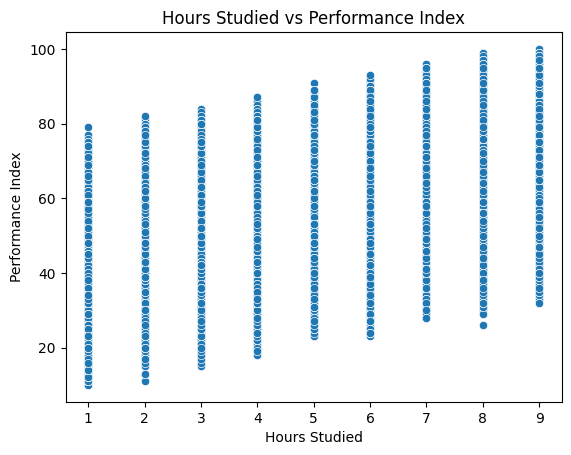

In [22]:
# Hours Studied vs Performance Index
sns.scatterplot(x='Hours Studied', y='Performance Index', data=per4mas)
plt.title('Hours Studied vs Performance Index')
plt.show()

This could imply that simply increasing study hours doesn’t guarantee better performance.

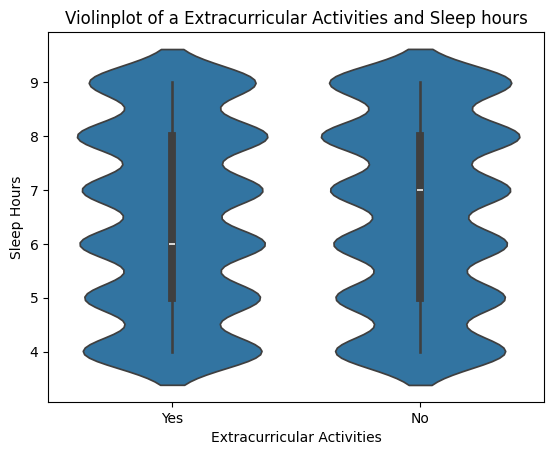

In [31]:
sns.violinplot(x='Extracurricular Activities', y="Sleep Hours", data=per4mas)
plt.title('Violinplot of a Extracurricular Activities and Sleep hours')
plt.show()

Similar Performance: Both groups have nearly the same average performance index, around 50.
Extracurricular Impact: This suggests that participating in extracurricular activities does not significantly affect the average performance index

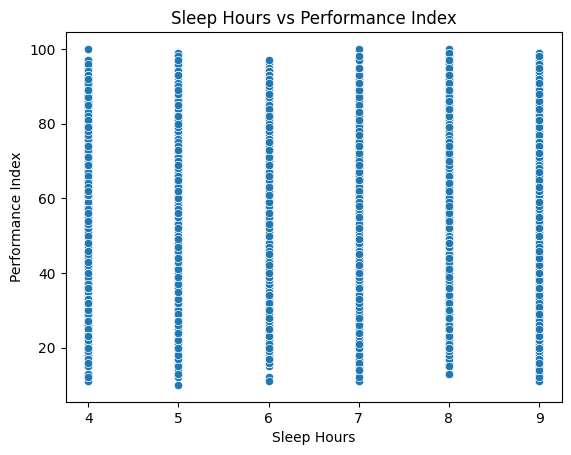

In [26]:
# Sleep Hours vs Performance Index
sns.scatterplot(x='Sleep Hours', y='Performance Index', data=per4mas)
plt.title('Sleep Hours vs Performance Index')
plt.show()

 Optimal sleep is crucial; both too little and too much sleep can negatively impact performance

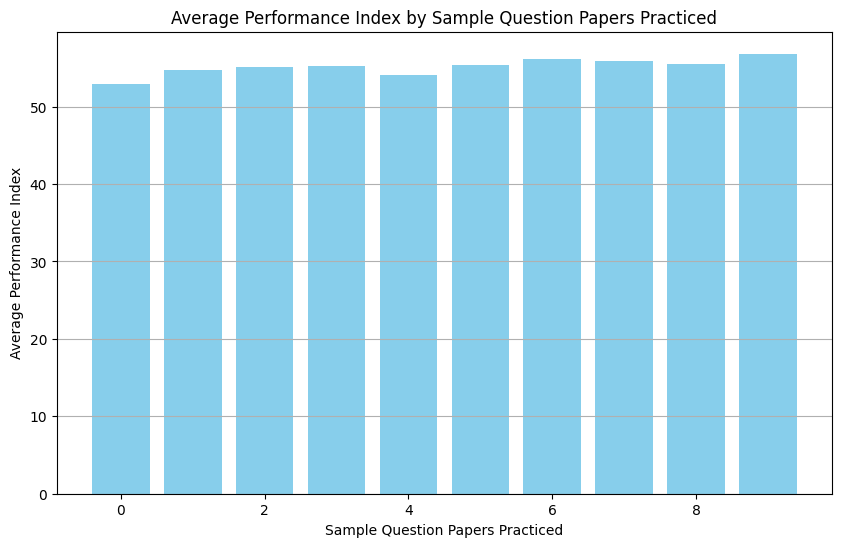

In [28]:
# Calculate the average performance index for each unique number of sample question papers practiced
avg_performance = per4mas.groupby('Sample Question Papers Practiced')['Performance Index'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_performance['Sample Question Papers Practiced'], avg_performance['Performance Index'], color='skyblue')
plt.title('Average Performance Index by Sample Question Papers Practiced')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Average Performance Index')
plt.grid(axis='y')
plt.show()

More practice can lead to better performance

<ipython-input-35-01deb1f595e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(per4mas["Performance Index"], kde=True, bins=40,color='red' )


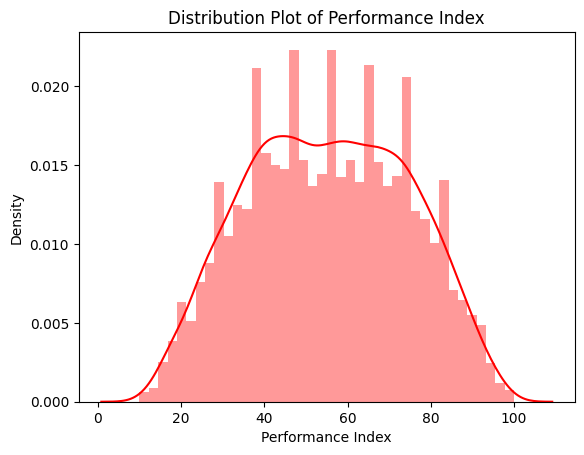

In [35]:
sns.distplot(per4mas["Performance Index"], kde=True, bins=40,color='red' )
plt.title('Distribution Plot of Performance Index')
plt.show()

The bell-shaped curve suggests a normal distribution, with most scores centered around the middle range.

In [36]:
#Get dummies encoding
per4mas_Tr = per4mas.copy()
per4mas_Tr = pd.get_dummies(per4mas_Tr, columns = ['Extracurricular Activities'])

In [37]:
per4mas_Tr = per4mas_Tr.replace({True: 1, False: 0})

In [38]:
per4mas_Tr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


In [42]:
# Correlation matrix
correlation_matrix = per4mas_Tr.corr()
#print(correlation_matrix)

In [44]:
correlation_matrix['Performance Index'].sort_values(ascending = False)

Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Extracurricular Activities_Yes      0.026075
Extracurricular Activities_No      -0.026075
Name: Performance Index, dtype: float64

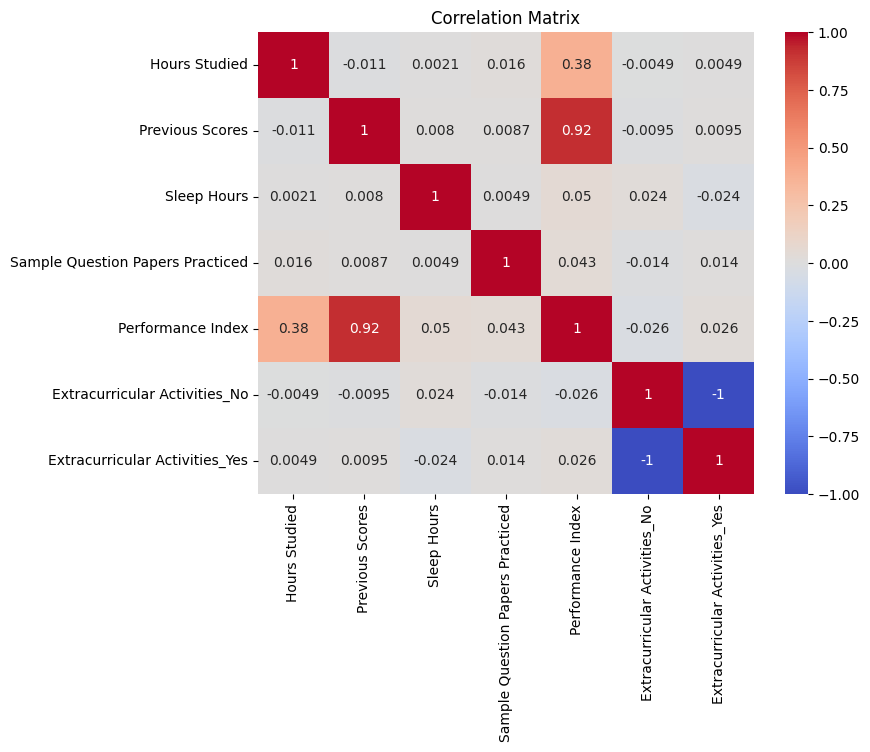

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
per4mas_Tr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


# Splitting data into features and Target groups :

In [48]:
Features=per4mas_Tr.drop(columns="Performance Index",axis=1)
Target=per4mas_Tr["Performance Index"]

In [49]:
Features

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,0,1
1,4,82,4,2,1,0
2,8,51,7,2,0,1
3,5,52,5,2,0,1
4,7,75,8,5,1,0
...,...,...,...,...,...,...
9995,1,49,4,2,0,1
9996,7,64,8,5,0,1
9997,6,83,8,5,0,1
9998,9,97,7,0,0,1


In [50]:
Target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [54]:
f_train,f_test,t_train,t_test=train_test_split(Features,Target,test_size=0.2,random_state=10)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
LR=LinearRegression()
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True,False]}


grid_search = GridSearchCV(LR, parameters, cv=5)
grid_search.fit(f_train, t_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score: 0.9888551615605069


In [58]:
LR=LinearRegression(fit_intercept=True,copy_X=True,positive=True)
LR.fit(f_train,t_train)
predicted=LR.predict(f_test)

In [59]:
predicted

array([75.95961937, 55.91089324, 71.64929764, ..., 19.68061203,
       49.1175591 , 84.48333367])

# Evaluate Linear regression model :

In [64]:
R2Score=r2_score(t_test, predicted)

In [65]:
R2Score*100

98.77782823407964

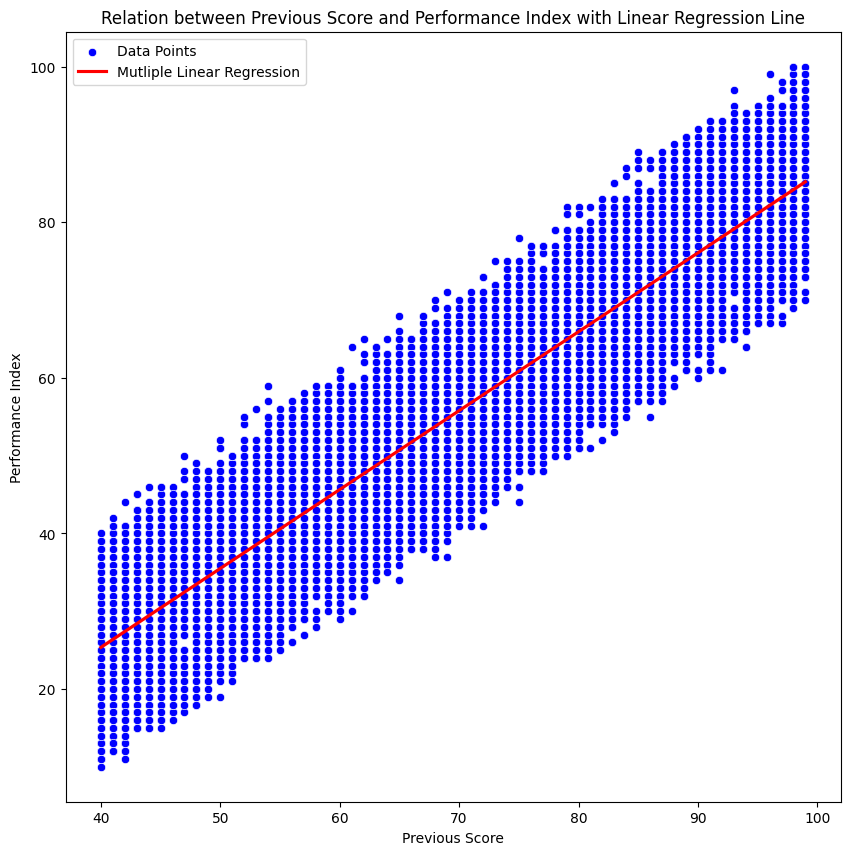

In [67]:
prev_score = per4mas_Tr['Previous Scores']
Performance_Index = per4mas_Tr['Performance Index']
plt.figure(figsize=(10, 10))
sns.scatterplot(x=prev_score, y=Performance_Index, color='blue', label='Data Points')
sns.regplot(x=prev_score, y=Performance_Index, scatter=False, color='red', label='Mutliple Linear Regression')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.title('Relation between Previous Score and Performance Index with Linear Regression Line')
plt.legend()
plt.show()

# Conclusion
 As previous scores increase, the performance index also tends to increase.The red line indicates the trend, showing a predictive relationship between the two variables.The data points are scattered around the regression line, suggesting some variability but a general upward trend.

 There is a strong positive correlation between Previous Scores and Performance Index (0.92), and between Hours Studied and Previous Scores (0.38).

